In [2]:
from gutenberg.acquire import load_etext
from gutenberg.cleanup import strip_headers
import seaborn as sns
from collections import Counter
import random
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def split_text_into_half_randomly(text_list):
    return partition(text_list,2)

In [4]:
def partition(lst, n): 
    division = len(lst) / float(n) 
    return [ lst[int(round(division * i)): int(round(division * (i + 1)))] for i in xrange(n) ]

In [5]:
def plot_counts(counts_arr):
    word_arr_encoded = []
    word_arr_numbers = []
    for k, v in counts_arr:
        word_arr_encoded.append(k.encode('utf-8').decode('utf-8'))
        word_arr_numbers.append(v)
    plt.figure(figsize=(16, 6))
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.title('Word Frequency per Word')
    sns.barplot(word_arr_encoded,word_arr_numbers)

In [6]:
def get_text_from_ids(ids):
    text = ""
    for i in ids:
        try:
            text = text + " " + strip_headers(load_etext(int(i))).strip()
        except:
            print "error: "+i
            continue
    return text

In [7]:
def get_order_from_text(text_list):
    counts = Counter(text_list)
    return counts

In [8]:
def get_frequencies_from_text(text_list):
    counts = Counter(text_list)
    return counts

In [9]:
def do_analysis(ids, is_chinese=False, n = 30):
    text = get_text_from_ids(ids)
    text_list = list(text) if is_chinese else text.split()
    random.shuffle(text_list)
    split_text_list = split_text_into_half_randomly(text_list)
    order = get_order_from_text(split_text_list[0])
    frequencies = get_frequencies_from_text(split_text_list[1])
    o = order.most_common()
    f = frequencies.most_common()
    new_list = []
    for i in range(0,len(o)):
        val = ""
        if frequencies[o[i][0]]:
            val = frequencies[o[i][0]]
        try:
            if val == '':
                continue
            new_list.append((o[i][0], val))
        except:
            print i
    plot_counts(new_list[0:n])
    return new_list

In [10]:
import pandas as pd
df = pd.read_csv('~/Documents/jacob hw/4B/SYDE 332/332proj/Dataset - Sheet1.csv', header=None)
df = df[2:]
df.columns = ['child','da','de','el','en','eo','es','fi','fr','hu','it','la','nl','pt','sv','tl','zh']
df.reset_index(inplace=True,drop=True)

In [11]:
import numpy as np
import math

In [12]:
def get_column_values(col):
    vals = df[col].values 
    return [x for x in vals if type(x) != float]

In [13]:
ids = {}
for i in ['da','de','el','en','eo','es','fi','fr','hu','it','la','nl','pt','sv','tl','zh']:
     ids[i]=random.sample(get_column_values(i),50)

In [14]:
import pickle

da
de
el
en
error: 33283
error: 5740
eo
es
error: 20029
error: 20029
fi
fr
error: 29781
hu
it
error: 26866
error: 31080
error: 46941
error: 36061
error: 19059
error: 45215
error: 11684
error: 45905
error: 44364
error: 46914
error: 47294
error: 27640
error: 34734
error: 18457
error: 43244
error: 42643
error: 28993
error: 53350
error: 42316
error: 47786
error: 45653
error: 58579
error: 46874
error: 46724
error: 14370
error: 43459
error: 56498
error: 7267
error: 41948
error: 9642
error: 49420
error: 42237
error: 10275
error: 27091
error: 56775
error: 42577
error: 50648
error: 40328
error: 35800
error: 36792
error: 48625
error: 47889
error: 48070
error: 39704
error: 29977
error: 14370
error: 50442
error: 17907
error: 49599
la
nl
pt
sv
tl
zh
error: 49965


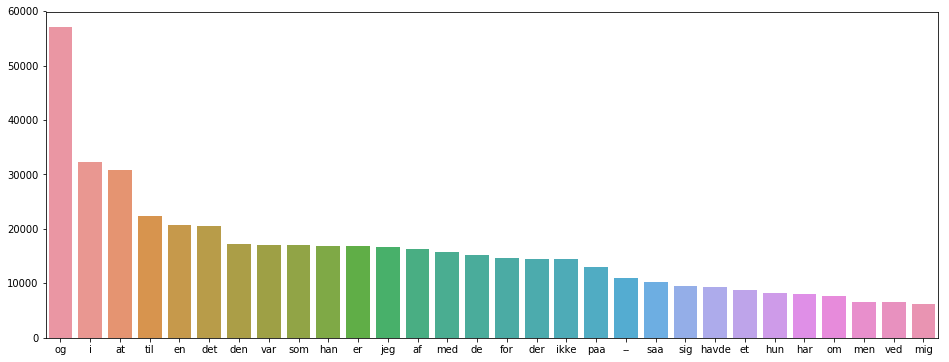

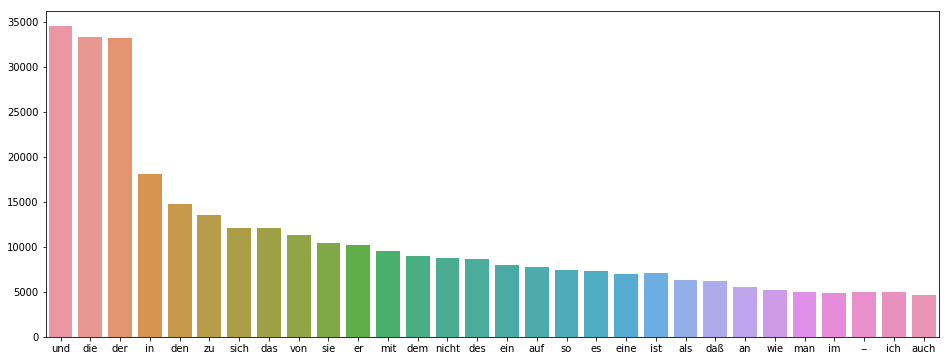

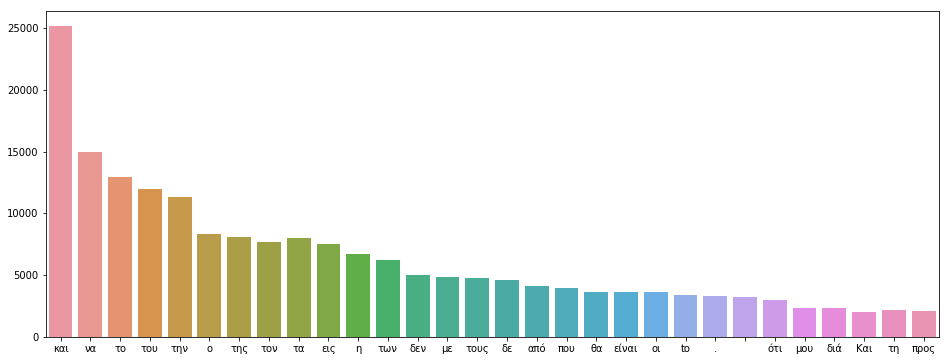

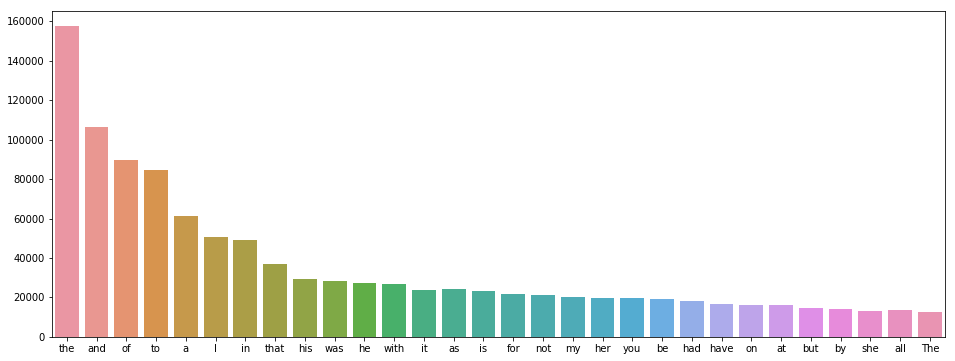

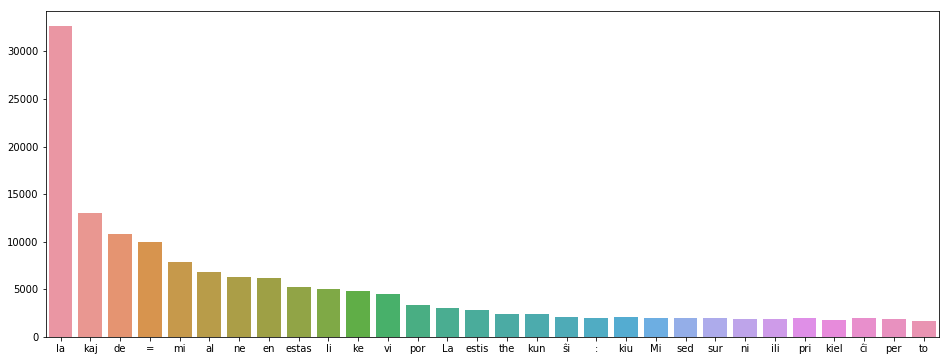

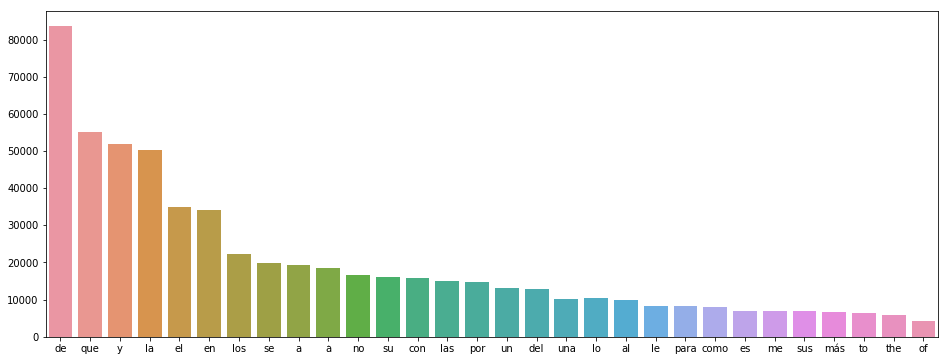

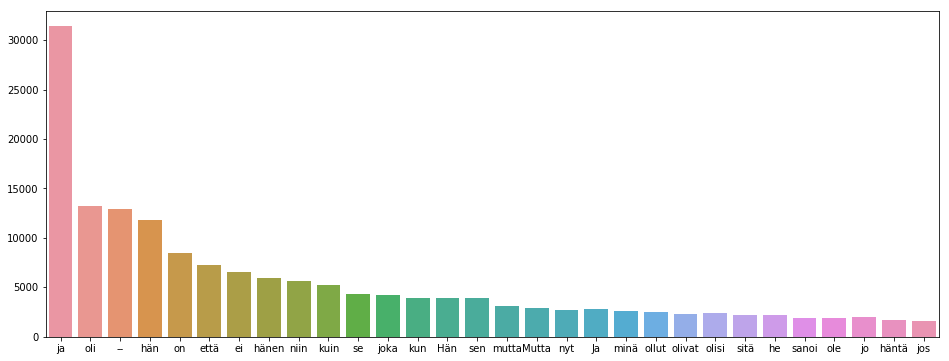

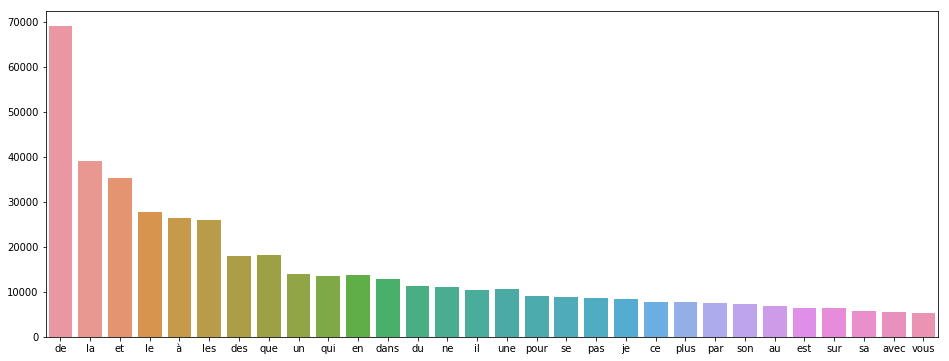

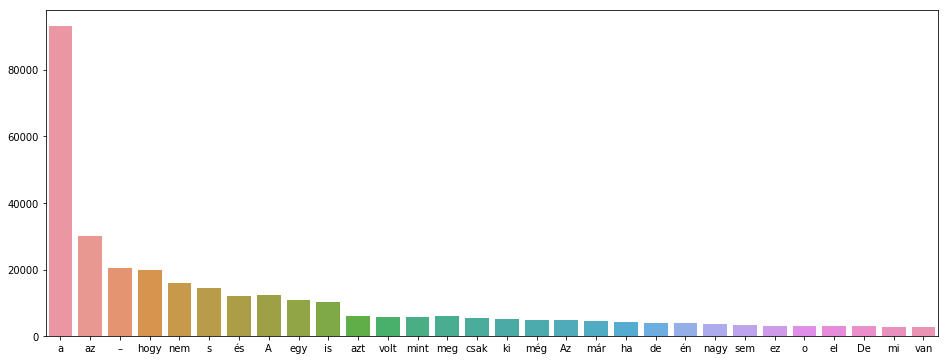

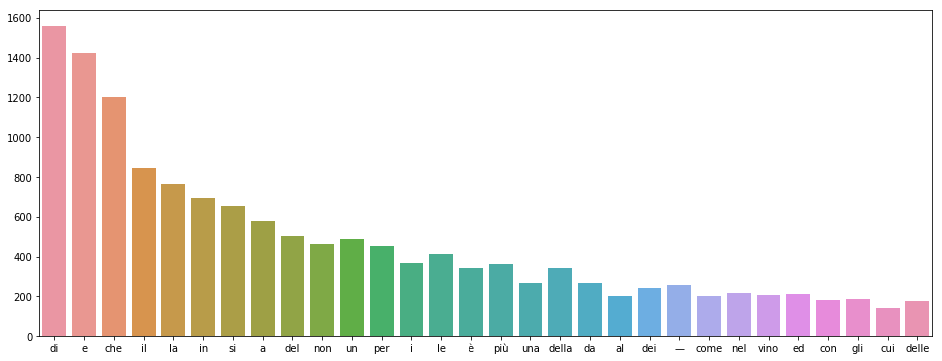

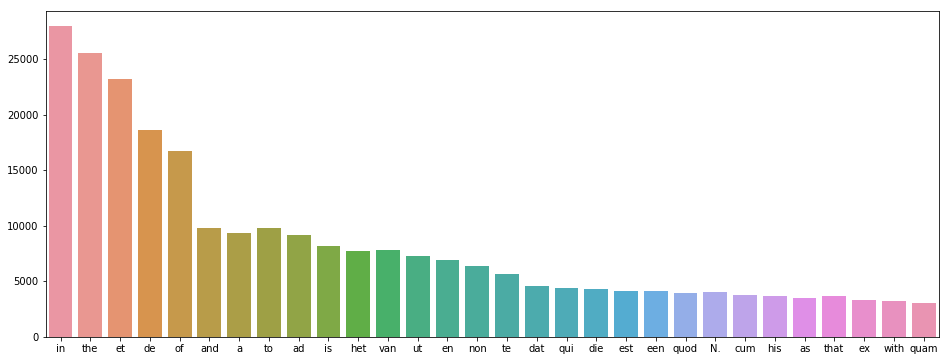

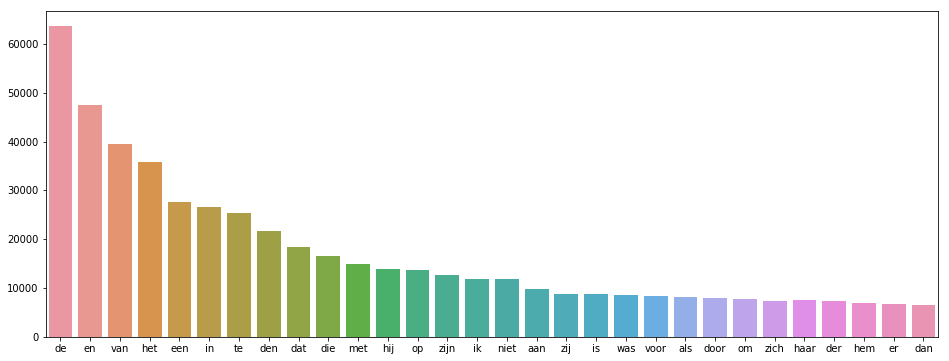

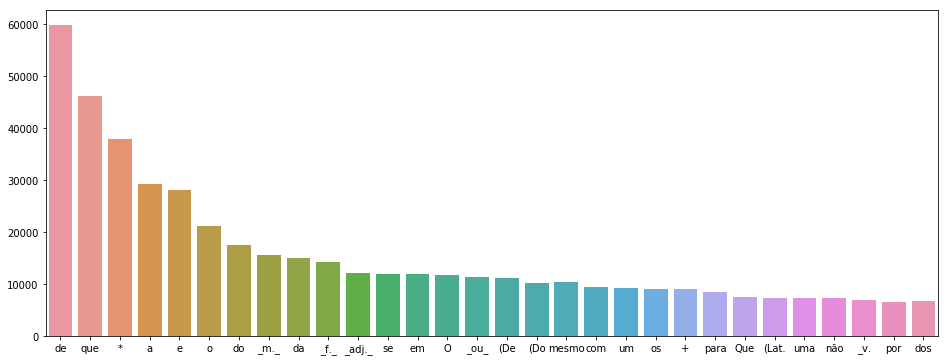

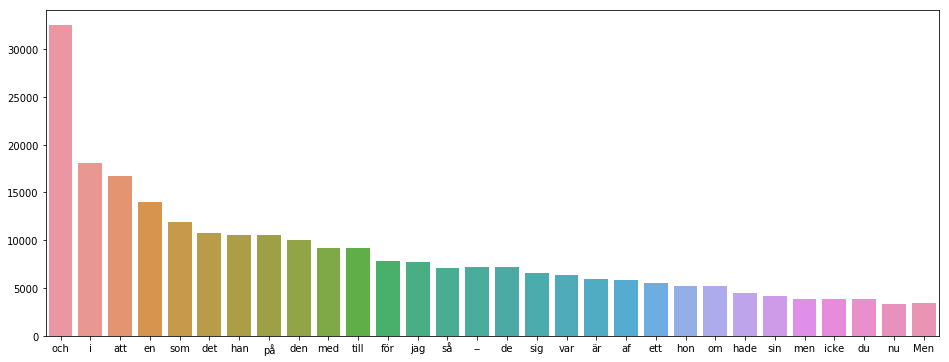

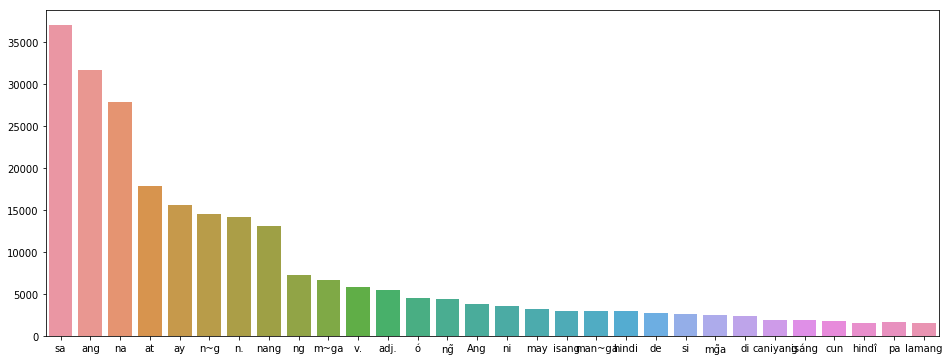

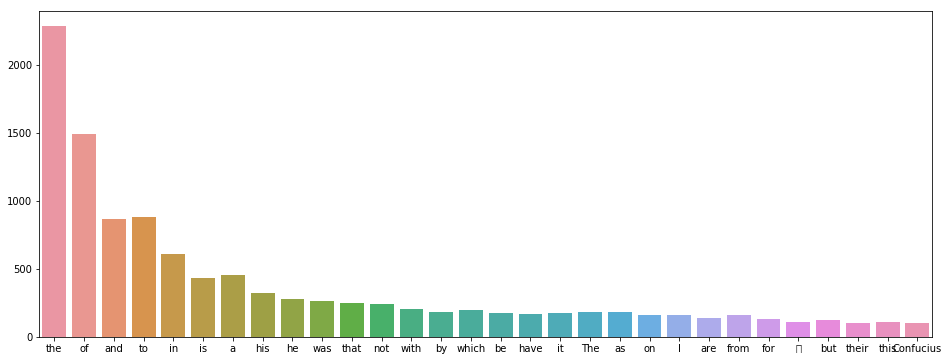

In [15]:
results = {}
for i in ['da','de','el','en','eo','es','fi','fr','hu','it','la','nl','pt','sv','tl','zh']:
    print i
    results[i] = do_analysis(ids[i])
    with open('data.pickle', 'wb') as handle:
        pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

error: 10275


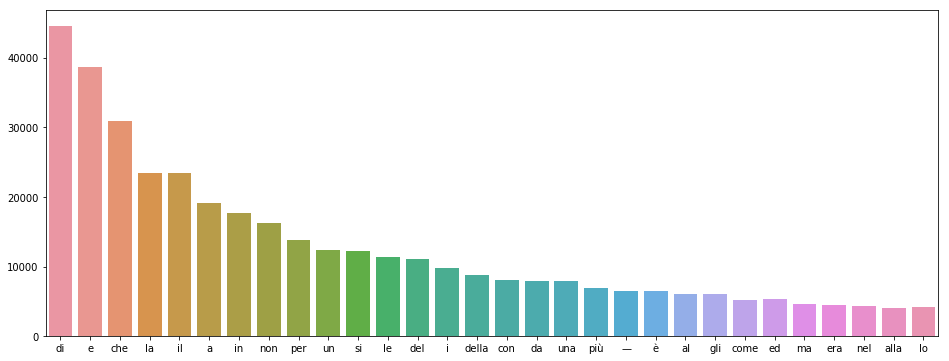

In [16]:
results['it'] = do_analysis(ids['it'])

with open('data.pickle', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

error: 49965


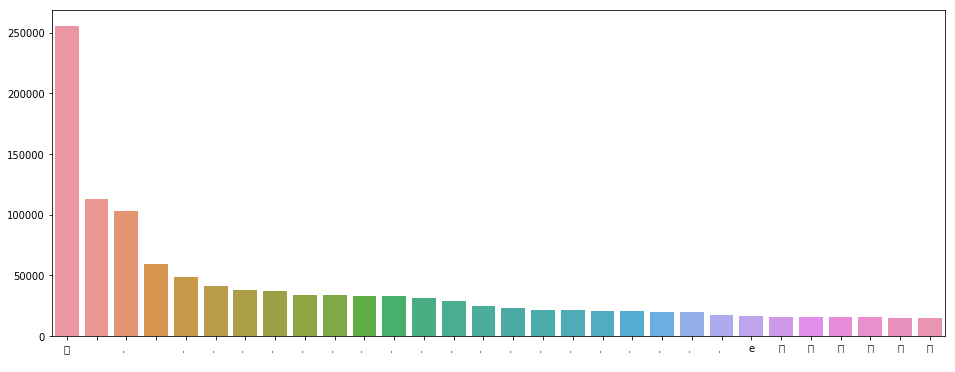

In [17]:
results['zh'] = do_analysis(ids['zh'], True)
with open('data.pickle', 'wb') as handle:
    pickle.dump(results, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
childrens_books_ids=random.sample(get_column_values('child'),50)

error: 17426
error: 23717


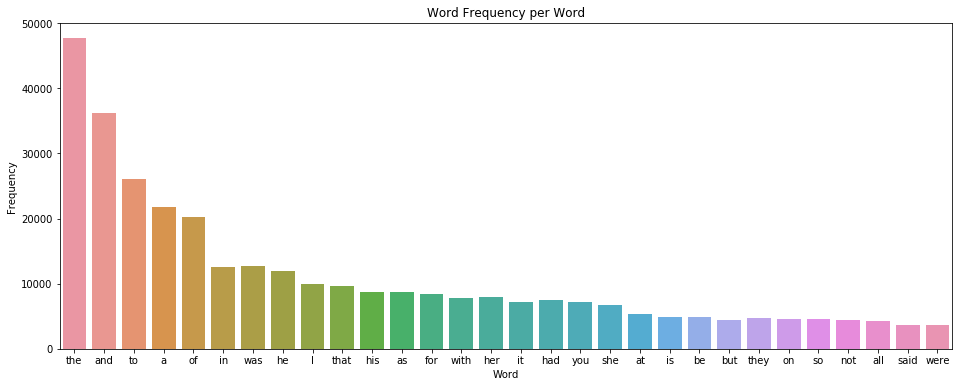

In [18]:
childrens_books_results = {}
childrens_books_results['results'] = do_analysis(childrens_books_ids)
with open('childrens_books_results.pickle', 'wb') as handle:
    pickle.dump(childrens_books_results, handle, protocol=pickle.HIGHEST_PROTOCOL)